Roberta Model Fine Tune

In [1]:
from model_src.roberta_base_fine_tune import train_model

trainer, model, tok, dataset = train_model(
    source="ed-donner/pricer-data",
    text_column="text",
    label_column="price",
    epochs=3,
    batch_size=16,
    eval_steps=500
)


/home/lisa/anaconda3/envs/llm_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 2000/2000 [00:00<00:00, 11673.61 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/lisa/Arupreza/ShopAI/model_src/roberta_base_fine_tune.py:157: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss,Rmse,Mae,R2
500,15.544700,14.559072,287.939575,217.006348,-1.314369
1000,0.977900,0.890997,176.437424,120.645210,0.131017
1500,0.694600,0.703207,158.974655,112.898949,0.294518
2000,0.195600,0.188815,169.201813,110.696526,0.200829
2500,0.093400,0.080346,122.888908,75.294235,0.578444
3000,0.068400,0.043254,109.873390,56.812489,0.663012
3500,0.052400,0.030408,84.135246,43.545132,0.802400
4000,0.046800,0.032830,100.425034,47.959381,0.718477
4500,0.040100,0.031249,96.855003,46.911621,0.738137
5000,0.035100,0.016704,75.063004,32.138050,0.842717


Validation metrics: {'eval_loss': 0.016085434705018997, 'eval_rmse': 73.46728515625, 'eval_mae': 31.877796173095703, 'eval_r2': 0.8493330711305338, 'eval_runtime': 39.7625, 'eval_samples_per_second': 1005.974, 'eval_steps_per_second': 62.873, 'epoch': 0.7111111111111111}
Test metrics: {'eval_loss': 1.402895450592041, 'eval_rmse': 224.31961059570312, 'eval_mae': 154.30364990234375, 'eval_r2': -0.4710033425457487, 'eval_runtime': 2.0528, 'eval_samples_per_second': 974.258, 'eval_steps_per_second': 60.891, 'epoch': 0.7111111111111111}
✅ Model saved to ./price_roberta_lora


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


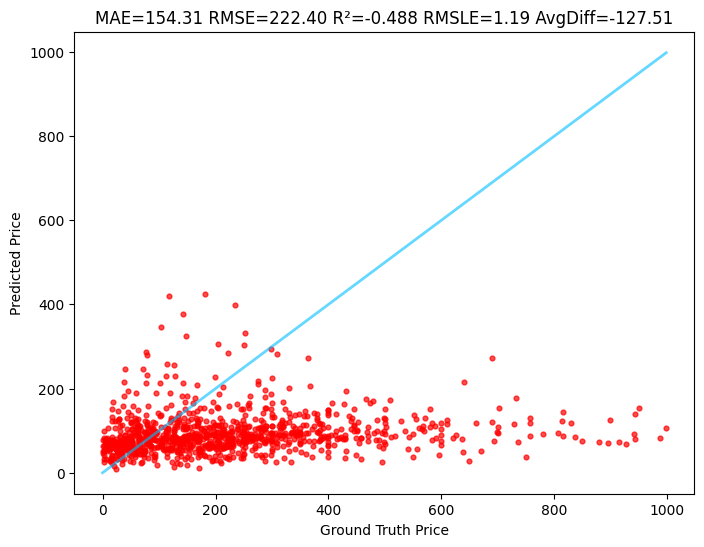

{'mae': 154.31402530077656, 'rmse': 222.39675161721857, 'r2': -0.4883020307624757, 'rmsle': 1.1910769360450686, 'avg_diff': -127.51351284671159}


In [3]:
from model_src.evaluation import evaluate_model

metrics = evaluate_model("price_roberta_lora/checkpoint-6500", num_samples=1000)
print(metrics)

Llama Model Fine Tune

In [1]:
from model_src.llama_8_b_base_fine_tune import train_sft

trainer, model, tokenizer, ds = train_sft(
    hf_user="Arupreza",
    dataset_name="ed-donner/pricer-data",
    base_model="meta-llama/Meta-Llama-3.1-8B",
    project_name="pricer",
    log_to_wandb=True,
    epochs=1,
    batch_size=4,
    save_steps=2000,
    run_name="debug_run",
    push_to_hub=False,       # don’t push when debugging
    train_size=1000,       # optional: subset
    eval_size=100           # optional: subset
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/lisa/.netrc
wandb: Currently logged in as: arupreza (arupreza-soonchunhyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Map:   0%|          | 0/400000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Memory footprint: 5591.5 MB


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 128001}.


Step,Training Loss,Validation Loss
200,2.315800,2.230994


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▃▅▆▆██
train/global_step,▁▃▅▆▆██
train/grad_norm,▂▁▂▂█
train/learning_rate,█▆▄▂▁
train/loss,█▂▁▂▂
eval/loss,2.23099
eval/runtime,20.4774


In [2]:
from model_src.evaluation import llama_evaluation

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Memory footprint: 5700.6 MB
1: Guess: $329.50 Truth: $374.41 Error: $44.91 SLE: 0.02 Item: OEM AC Compressor w/...
2: Guess: $158.25 Truth: $225.11 Error: $66.86 SLE: 0.12 Item: Motorcraft YB3125 Fa...
3: Guess: $44.69 Truth: $61.68 Error: $16.99 SLE: 0.10 Item: Dorman Front Washer ...
4: Guess: $486.00 Truth: $599.99 Error: $113.99 SLE: 0.04 Item: HP Premium HD Plus T...
5: Guess: $18.14 Truth: $16.99 Error: $1.15 SLE: 0.00 Item: Super Switch Pickup ...
6: Guess: $12.98 Truth: $31.99 Error: $19.01 SLE: 0.74 Item: Horror Bookmarks, Re...
7: Guess: $149.75 Truth: $101.79 Error: $47.96 SLE: 0.15 Item: SK6241 - Stinger 4 G...
8: Guess: $270.25 Truth: $289.00 Error: $18.75 SLE: 0.00 Item: Godox ML60Bi LED Lig...
9: Guess: $771.00 Truth: $635.86 Error: $135.14 SLE: 0.04 Item: Randall G3 Plus Comb...
10: Guess: $76.12 Truth: $65.99 Error: $10.14 SLE: 0.02 Item: HOLDWILL 6 Pack LED ...
11: Guess: $256.50 Truth: $254.21 Error: $2.29 SLE: 0.00 Item: Viking Horns 3 Gallo...
12: Guess: $403.00 Tr

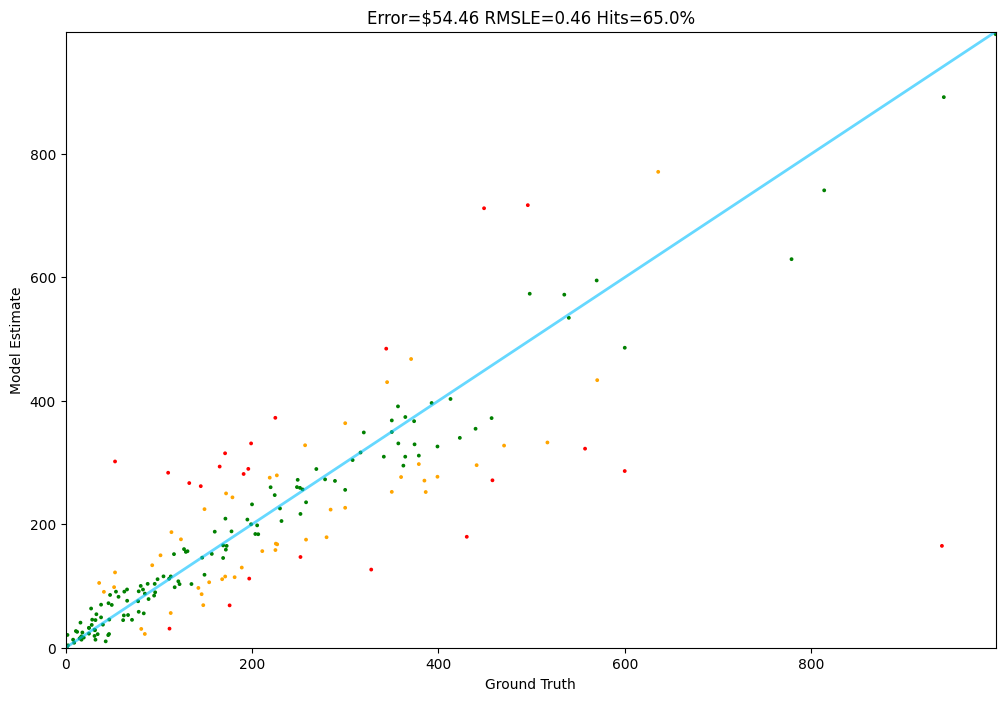

{'avg_error': 54.464722070312526, 'rmsle': 0.46026090647832746, 'hits_percent': 65.0}


In [4]:
results = llama_evaluation("/home/lisa/Arupreza/ShopAI/price_llama_lora/checkpoint-20000", test_amount=200)
print(results)

In [ ]:
from model_src.qwen_3_8_b_fine_tune import train_sft

trainer, model, tokenizer, ds = train_sft(
    hf_user="Arupreza",
    dataset_name="ed-donner/pricer-data",
    base_model="Qwen/Qwen3-8B",     # ✅ dense version
    project_name="price_qwen_lora",
    log_to_wandb=True,
    epochs=1,
    batch_size=2,
    grad_accum=2,
    save_steps=1000,
    run_name="trial_1",
    push_to_hub=False,
    train_size=100000,
    eval_size=1000
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/lisa/.netrc
wandb: Currently logged in as: arupreza (arupreza-soonchunhyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Memory footprint: 5962.8 MB


The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


Step,Training Loss,Validation Loss
200,2.474900,2.433699
400,2.408400,2.390962


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


eval/loss,█▁
eval/runtime,█▁
eval/samples_per_second,▁█
eval/steps_per_second,▁█
train/epoch,▁▂▃▃▃▄▅▆▆▆▇██
train/global_step,▁▂▃▃▃▄▅▆▆▆▇██
train/grad_norm,▁▁▃▆▅▃▇██▆
train/learning_rate,██▇▆▅▄▃▂▁▁
train/loss,█▄▃▂▂▂▂▁▁▁
eval/loss,2.39096
eval/runtime,43.7382


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Memory footprint: 6137.4 MB
1: Guess: $1.98 Truth: $374.41 Error: $372.43 SLE: 23.39 Item: OEM AC Compressor w/...
2: Guess: $1.54 Truth: $225.11 Error: $223.57 SLE: 20.16 Item: Motorcraft YB3125 Fa...
3: Guess: $1.69 Truth: $61.68 Error: $59.99 SLE: 9.91 Item: Dorman Front Washer ...
4: Guess: $1.76 Truth: $599.99 Error: $598.23 SLE: 28.97 Item: HP Premium HD Plus T...
5: Guess: $1.52 Truth: $16.99 Error: $15.47 SLE: 3.86 Item: Super Switch Pickup ...
6: Guess: $1.39 Truth: $31.99 Error: $30.60 SLE: 6.89 Item: Horror Bookmarks, Re...
7: Guess: $1.51 Truth: $101.79 Error: $100.28 SLE: 13.79 Item: SK6241 - Stinger 4 G...
8: Guess: $1.87 Truth: $289.00 Error: $287.13 SLE: 21.29 Item: Godox ML60Bi LED Lig...
9: Guess: $1.92 Truth: $635.86 Error: $633.94 SLE: 28.99 Item: Randall G3 Plus Comb...
10: Guess: $1.51 Truth: $65.99 Error: $64.48 SLE: 10.80 Item: HOLDWILL 6 Pack LED ...
11: Guess: $1.82 Truth: $254.21 Error: $252.39 SLE: 20.29 Item: Viking Horns 3 Gallo...
12: Guess: $1.75 Truth: 

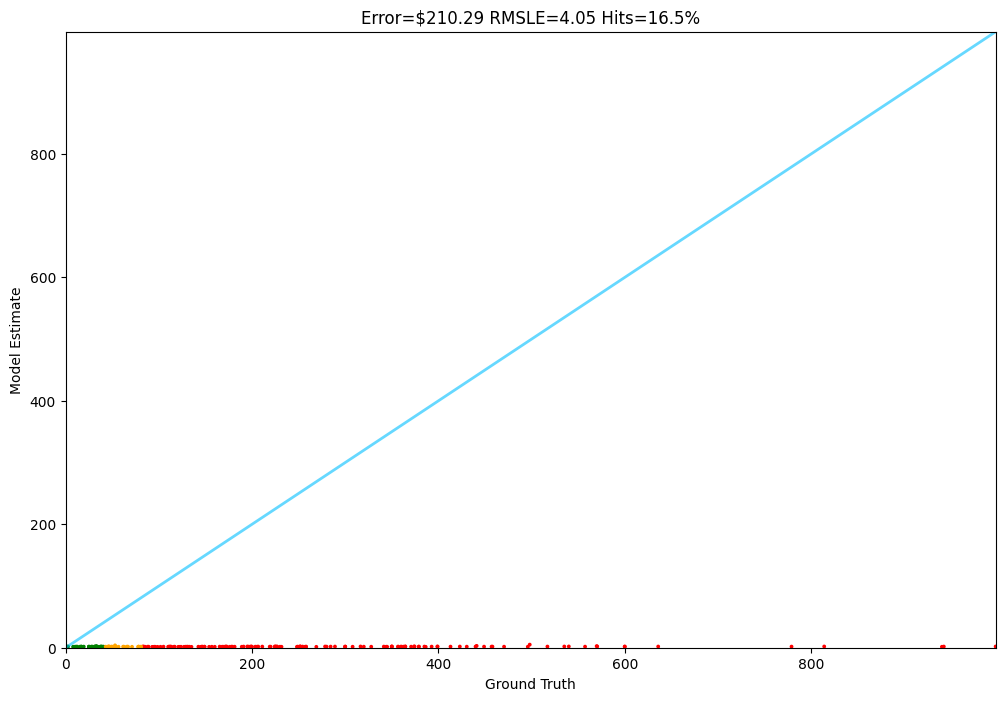

{'avg_error': 210.28854580307907, 'rmsle': 4.053601760223841, 'hits_percent': 16.5}


In [3]:
from model_src.evaluation import qwen_evaluation

results = qwen_evaluation("test_qwen3_8b-test_qwen3_debug/checkpoint-500", test_amount=200)
print(results)